# Data Acquisition

In [8]:
import pandas as pd 

file_path = r"D:\Placement Preparation\Self Online Internship\CustomerChurn\customer_churn_data.csv"

data = pd.read_csv(r"D:\Placement Preparation\Self Online Internship\CustomerChurn\customer_churn_data.csv")

print("Dataset Preview:")
print(data.head())


Dataset Preview:
  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0000    Male              0      No        Yes      23           No   
1   CUST0001  Female              0     Yes         No      43           No   
2   CUST0002    Male              1      No         No      51          Yes   
3   CUST0003    Male              1      No         No      72          Yes   
4   CUST0004    Male              1      No         No      25          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service              No  No internet service  ...   
1  No phone service             DSL                  Yes  ...   
2                No             DSL                   No  ...   
3               Yes             DSL                  Yes  ...   
4               Yes             DSL                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No i

# Data Preprocessing

In [9]:
print("\nDataset Information:")
print(data.info())

print("\nDataset Description:")
print(data.describe())

print("\nColumn Types:")
print(data.dtypes)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  58

In [10]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values in Each Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing Values After Cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0

In [11]:
for col in categorical_columns:
    data[col] = data[col].astype('category')

print("\nData Types After Conversion:")
print(data.dtypes)


Data Types After Conversion:
customerID          category
gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = data.select_dtypes(include=['category']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

print("\nSample of Transformed Data:")
print(data.head())


Sample of Transformed Data:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           0       1              0        0           1      23   
1           1       0              0        1           0      43   
2           2       1              1        0           0      51   
3           3       1              1        0           0      72   
4           4       1              1        0           0      25   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                2               1  ...   
1             0              1                0               2  ...   
2             1              0                0               0  ...   
3             1              2                0               2  ...   
4             1              2                0               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 1            1            1  

# Feature Engineering

In [13]:
X = data.drop(columns=['Churn'])  
y = data['Churn'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)



Training Set Shape: (4704, 20)
Test Set Shape: (1176, 20)


# Model Selection

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=2000)

# Model Training

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

In [18]:
import joblib

joblib.dump(logreg, 'logreg_customer_churn_model.pkl')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
joblib.dump(label_encoder, 'label_encoder.pkl') 


['label_encoder.pkl']

In [19]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

# Model Evaluation


Logistic Regression Performance:
Accuracy: 0.4906462585034014

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.63      0.55       584
           1       0.49      0.35      0.41       592

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.48      1176
weighted avg       0.49      0.49      0.48      1176


Confusion Matrix:
[[369 215]
 [384 208]]


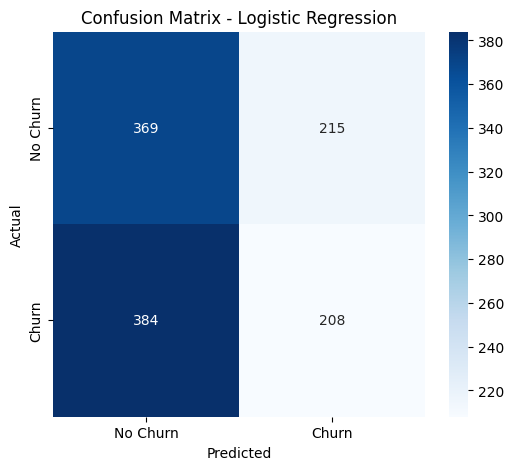

ROC-AUC Score: 0.482489124398371


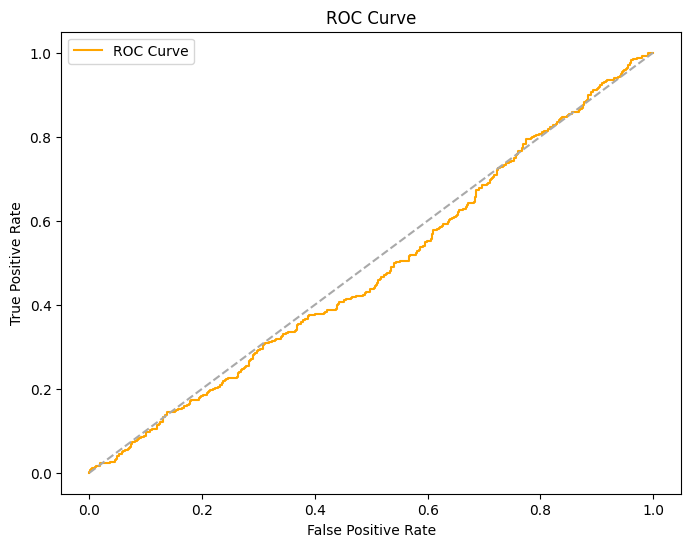

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)

print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



Logistic Regression Performance Evaluation:

Confusion Matrix:
[[369 215]
 [384 208]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.63      0.55       584
           1       0.49      0.35      0.41       592

    accuracy                           0.49      1176
   macro avg       0.49      0.49      0.48      1176
weighted avg       0.49      0.49      0.48      1176



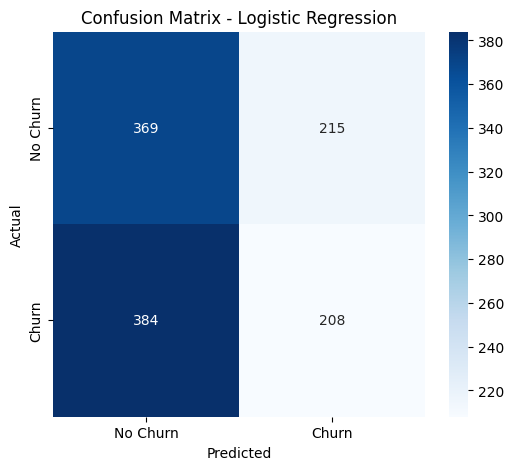

In [21]:
print("\nLogistic Regression Performance Evaluation:")

conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_logreg)
print("\nClassification Report:")
print(class_report)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [22]:
y_pred = logreg.predict(X_test_scaled)

In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.4906462585034014


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[369 215]
 [384 208]]


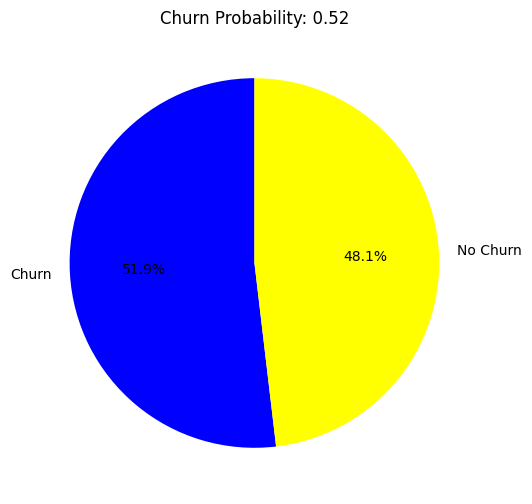

In [25]:
import matplotlib.pyplot as plt
import numpy as np

probability = logreg.predict_proba(X_test_scaled[0:1])[0, 1]

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie([probability, 1 - probability], labels=['Churn', 'No Churn'], autopct='%1.1f%%', startangle=90, colors=['blue', 'yellow'])
ax.set_title(f"Churn Probability: {probability:.2f}")
plt.show()

In [26]:
data = pd.read_csv('customer_churn_data.csv')
print(data.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
